<a href="https://colab.research.google.com/github/fun-debug/demo/blob/main/d2l/chapter_computer-vision/bounding_box.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 目标检测和边界框

In [1]:
!pip install d2l matplotlib-inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.6/112.6 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 81.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 98.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 106.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 71.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 81.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.

In [2]:
!pip install matplotlib==3.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 41.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.0.0-cp38-cp38-linux_x86_64.whl size=11844560 sha256=22be096f00f0f297e008e4594eeaa12eb82bfbaed5c1d06ddd0b4888280bdf16
  Stored in directory: /root/.cache/pip/wheels/a9/1e/ed/3e09c67472517aa5d81f8c15de6c81162d249ebe442e4f3007
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires matplotlib!=3.0.0,>=2.0.2, but you have matplotlib 3.0.0 which is incompatible.
scikit-image 0.18.3 req

In [3]:
%matplotlib inline
import torch
from d2l import torch as d2l

In [4]:
!pwd

/content


In [5]:
!mkdir cv

In [6]:
!cd cv

In [7]:
!wget https://raw.githubusercontent.com/fun-debug/demo/main/d2l/img/catdog.jpg

--2023-02-09 11:25:34--  https://raw.githubusercontent.com/fun-debug/demo/main/d2l/img/catdog.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32576 (32K) [image/jpeg]
Saving to: ‘catdog.jpg’

catdog.jpg          100%[===================>]  31.81K  --.-KB/s    in 0s      

2023-02-09 11:25:34 (120 MB/s) - ‘catdog.jpg’ saved [32576/32576]



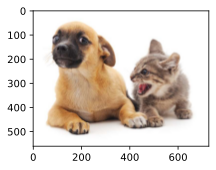

In [8]:
d2l.set_figsize()
img=d2l.plt.imread('catdog.jpg')
d2l.plt.imshow(img)

In [10]:
def box_corner_to_center(boxes):
  """从（左上，右下）转换到（中间，宽度，高度）"""
  x1,y1,x2,y2=boxes[:,0],boxes[:,1],boxes[:,2],boxes[:,3]
  cx=(x1+x2)/2
  cy=(y1+y2)/2
  w=x2-x1
  h=y2-y1
  boxes=torch.stack((cx,cy,w,h),axis=-1)
  return boxes

def box_center_to_corner(boxes):
  """从（中间，宽度，高度）转换到（左上，右下）"""
  cx,cy,w,h=boxes[:,0],boxes[:,1],boxes[:,2],boxes[:,3]
  x1=cx-0.5*w
  x2=cx+0.5*w
  y1=cy-0.5*h
  y2=cy+0.5*h
  boxes=torch.stack((x1,y1,x2,y2),axis=-1)
  return boxes

In [11]:
dog_bbox,cat_bbox=[60.0,45.0,378.0,516.0],[400.0, 112.0, 655.0, 493.0]

In [12]:
boxes=torch.tensor((dog_bbox,cat_bbox))
box_center_to_corner(box_corner_to_center(boxes))==boxes

tensor([[True, True, True, True],
        [True, True, True, True]])

In [13]:
def bbox_to_rect(bbox,color):
  # 将边界框(左上x,左上y,右下x,右下y)格式转换成matplotlib格式：
  # ((左上x,左上y),宽,高)
  return d2l.plt.Rectangle(
      xy=(bbox[0], bbox[1]), width=bbox[2]-bbox[0], height=bbox[3]-bbox[1],fill=False, edgecolor=color, linewidth=2
  )

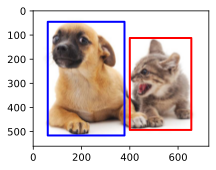

In [14]:
fig=d2l.plt.imshow(img)
fig.axes.add_patch(bbox_to_rect(dog_bbox,'blue'))
fig.axes.add_patch(bbox_to_rect(cat_bbox,'red'))